In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns       

In [2]:
# Load the dataset
df = pd.read_csv('districtwise_crimes.csv')

# Basic info
print("Shape of the dataset:", df.shape) 
df.head()
print(df.columns.tolist())
print(df.iloc[0].tolist())


Shape of the dataset: (5322, 124)
['id', 'year', 'state_name', 'state_code', 'district_name', 'district_code', 'registration_circles', 'murder', 'clpbl_hmcrd_not_amt_murder', 'hit_and_run', 'acdnt_other_than_hit_and_run_', 'deaths_negl_rel_rail_acdnt', 'deaths_due_med_negnc', 'deaths_neg_civic_bodies', 'deaths_other_negnc', 'dowry_deaths', 'abetment_of_suicide', 'atmpt_cmmt_murder', 'atmpt_cmmt_clpb_hmcrd', 'atmpt_cmmt_suicide', 'miscarr_infant_foetic_aband', 'vlntrly_caus_simple_hurt', 'vlntrly_caus_dangers_weapons', 'vlntrly_caus_pub_srvnt_duty', 'hrt_endgrng_lf_safety', 'other_simple_hurt', 'vlntrly_caus_grvus_hurt', 'grvus_hrt_dangerous_wepn', 'acid_attack', 'atmpt_acid_attack', 'grvus_hrt_pub_srvnt_duty', 'grvus_hrt_lf_safety', 'other_grievous_hurt', 'wrngful_rest_cnfm', 'assault_on_women', 'sex_hrrsmt_work_office_prms', 'sex_hrrsmt_pub_trnsprt_sys', 'sex_hrrsmt_shelter_homes', 'sex_hrrsmt_other_places', 'intnt_disrbe', 'voyeurism', 'stalking', 'missing_child_kidnpd', 'other_kidnp

In [3]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 id                              0
year                            0
state_name                      0
state_code                      0
district_name                   0
                               ..
crlty_husbnd_relatives          0
crcl_false_fake_news_rumours    0
criminal_intimidation           0
insult_modesty_women            0
other_ipc_crimes                0
Length: 124, dtype: int64


In [4]:
# Fix column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df = df.drop(["state_code", "district_code", "registration_circles"], axis=1)

In [5]:
# View data types
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 id                                int64
year                              int64
state_name                       object
district_name                    object
murder                          float64
                                 ...   
crlty_husbnd_relatives          float64
crcl_false_fake_news_rumours    float64
criminal_intimidation           float64
insult_modesty_women            float64
other_ipc_crimes                float64
Length: 121, dtype: object


In [6]:
# Convert year to int
df['year'] = df['year'].astype(int)

#print(df.columns)

# Show unique states and districts and their counts
print("Unique states count:", df['state_name'].nunique())
print("Unique districts count:", df['district_name'].nunique())
print("Unique states:", df['state_name'].unique())
print("Unique districts:", df['district_name'].unique())

Unique states count: 36
Unique districts count: 749
Unique states: ['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu And Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal'
 'Andaman And Nicobar Islands' 'Chandigarh'
 'The Dadra And Nagar Haveli And Daman And Diu' 'Delhi' 'Lakshadweep'
 'Puducherry' 'Ladakh']
Unique districts: ['Ananthapuramu' 'Chittoor' 'Y.S.R.' 'East Godavari' 'Guntur' 'Krishna'
 'Kurnool' 'Sri Potti Sriramulu Nellore' 'Prakasam' 'Srikakulam'
 'Tirupati' 'Ntr' 'Visakhapatnam' 'Vizianagaram' 'West Godavari' 'Anjaw'
 'Changlang' 'Papum Pare' 'Dibang Valley' 'East Kameng' 'West Kameng'
 'Kurung Kumey' 'Lohit' 'Longding' 'Lower Dibang Valley' 'East Siang'
 'Upper Siang' 'West Siang' 'Lower Subansiri' 'Upper Subansiri' 

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le_state = LabelEncoder()
le_district = LabelEncoder()
df['state_name_code'] = le_state.fit_transform(df['state_name'])
df['district_name_code'] = le_district.fit_transform(df['district_name'])

In [8]:
print(df.columns.tolist())

['id', 'year', 'state_name', 'district_name', 'murder', 'clpbl_hmcrd_not_amt_murder', 'hit_and_run', 'acdnt_other_than_hit_and_run_', 'deaths_negl_rel_rail_acdnt', 'deaths_due_med_negnc', 'deaths_neg_civic_bodies', 'deaths_other_negnc', 'dowry_deaths', 'abetment_of_suicide', 'atmpt_cmmt_murder', 'atmpt_cmmt_clpb_hmcrd', 'atmpt_cmmt_suicide', 'miscarr_infant_foetic_aband', 'vlntrly_caus_simple_hurt', 'vlntrly_caus_dangers_weapons', 'vlntrly_caus_pub_srvnt_duty', 'hrt_endgrng_lf_safety', 'other_simple_hurt', 'vlntrly_caus_grvus_hurt', 'grvus_hrt_dangerous_wepn', 'acid_attack', 'atmpt_acid_attack', 'grvus_hrt_pub_srvnt_duty', 'grvus_hrt_lf_safety', 'other_grievous_hurt', 'wrngful_rest_cnfm', 'assault_on_women', 'sex_hrrsmt_work_office_prms', 'sex_hrrsmt_pub_trnsprt_sys', 'sex_hrrsmt_shelter_homes', 'sex_hrrsmt_other_places', 'intnt_disrbe', 'voyeurism', 'stalking', 'missing_child_kidnpd', 'other_kidnp_abduc', 'kidnp_abdctn_begging', 'kidnp_abdctn_murder', 'kidnapping_for_ransom', 'kidnp_a

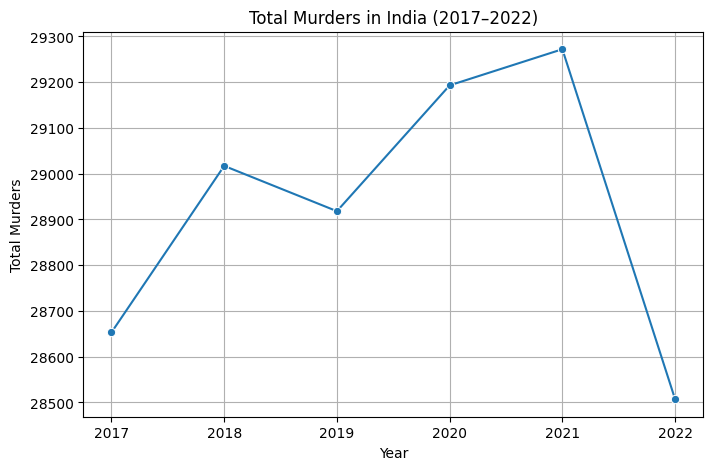

In [9]:
# Convert murder data type to int
df['murder'] = df['murder'].astype(int)

# Total number of murders per year
murders_per_year = df.groupby('year')['murder'].sum().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.lineplot(x='year', y='murder', data=murders_per_year, marker='o')
plt.title('Total Murders in India (2017–2022)')
plt.ylabel('Total Murders')
plt.xlabel('Year')
plt.grid(True)
plt.show()


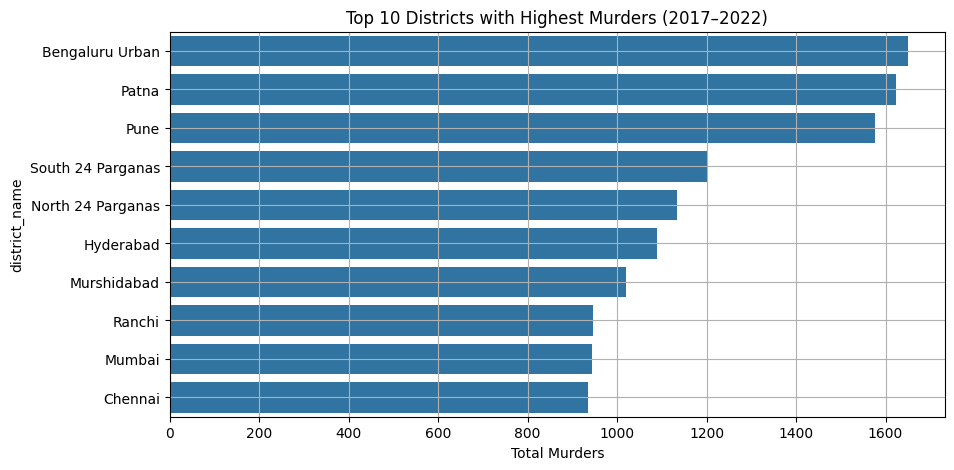

In [10]:
# Districts with Most Murders

murder_districts = df.groupby('district_name')['murder'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=murder_districts.values, y=murder_districts.index)
plt.title("Top 10 Districts with Highest Murders (2017–2022)")
plt.xlabel("Total Murders")
plt.grid(True)
plt.show()


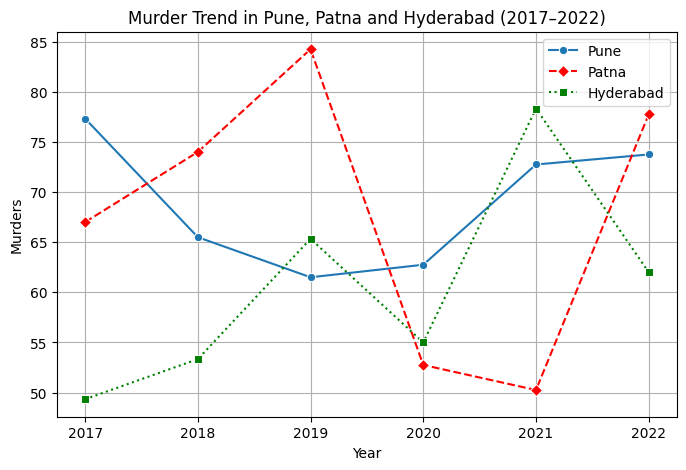

In [11]:
# Individual District Trend in Pune and Patna

pune = df[df['district_name'].str.strip().str.lower() == 'pune']
patna = df[df['district_name'].str.strip().str.lower() == 'patna']  
hyderabad = df[df['district_name'].str.strip().str.lower() == 'hyderabad']  

plt.figure(figsize=(8,5))
sns.lineplot(x='year', y='murder', data=pune, marker='o',label = "Pune", errorbar=None)
sns.lineplot(x='year', y='murder', data=patna, marker='D', label = "Patna", linestyle ='--', color="red", errorbar=None)
sns.lineplot(x='year', y='murder', data=hyderabad, marker='s', label = "Hyderabad", linestyle =':', color="green", errorbar=None)
plt.title("Murder Trend in Pune, Patna and Hyderabad (2017–2022)")
plt.ylabel("Murders")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
df.head()

# Order change of last two columns
cols = df.columns.tolist()
last_two = cols[-2:]

# Remove them from original position
remaining = [col for col in cols if col not in last_two]

# Insert last_two[0] at position 1 (2nd place)
remaining.insert(3, last_two[0])

# Insert last_two[1] at position 3 (4th place) — account for earlier insert shifting
remaining.insert(5, last_two[1])

# Reorder DataFrame
df = df[remaining]

df.head()

,id,year,state_name,state_name_code,district_name,district_name_code,murder,clpbl_hmcrd_not_amt_murder,hit_and_run,acdnt_other_than_hit_and_run_,...,ofnc_religion,cheating_impersonation,ofnc_mischief,arson,criminal_trespass,crlty_husbnd_relatives,crcl_false_fake_news_rumours,criminal_intimidation,insult_modesty_women,other_ipc_crimes
0,0,2017,Andhra Pradesh,1,Ananthapuramu,24,113,4.0,50.0,503.0,...,6.0,4.0,9.0,38.0,198.0,471.0,0.0,139.0,8.0,159.0
1,1,2017,Andhra Pradesh,1,Chittoor,137,70,5.0,36.0,461.0,...,0.0,0.0,4.0,7.0,100.0,212.0,1.0,26.0,12.0,470.0
2,2,2017,Andhra Pradesh,1,Y.S.R.,743,88,10.0,32.0,437.0,...,0.0,1.0,44.0,68.0,198.0,481.0,0.0,332.0,60.0,447.0
3,3,2017,Andhra Pradesh,1,East Godavari,192,69,14.0,138.0,503.0,...,12.0,0.0,25.0,40.0,848.0,601.0,0.0,50.0,127.0,48.0
4,4,2017,Andhra Pradesh,1,Ananthapuramu,24,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,6.0


In [13]:
# Function to generate time-series samples
def create_time_series_samples(df, crime_col='murder', window=3):
    samples = []
    targets = []
    districts = []
    target_years = []

    # Loop through each district
    for dist in df['district_name_code'].unique():
        dist_df = df[df['district_name_code'] == dist].sort_values('year')
        series = dist_df[crime_col].values

        # Only keep districts with enough years
        if len(series) >= window + 1:
            for i in range(len(series) - window):
                X = series[i:i+window]           # Past 3 years
                y = series[i+window]             # Next year
                year = dist_df['year'].values[i+window]
                samples.append(X)
                targets.append(y)
                districts.append(dist)
                target_years.append(year)

    return np.array(samples), np.array(targets), np.array(districts), np.array(target_years)

# Function apply
X, y, district_ids, target_year = create_time_series_samples(df, crime_col='robbery', window=3)

# Add district_code as 4th feature
X_augmented = np.hstack([X, district_ids.reshape(-1, 1)])

print("X shape:", X.shape)  # (samples, 3 years)
print("y shape:", y.shape)  # (samples,)
print("district_ids shape", district_ids.shape)
print("target_year shape", target_year.shape)
print("X_augmented shape", X_augmented.shape)

X shape: (3120, 3)
y shape: (3120,)
district_ids shape (3120,)
target_year shape (3120,)
X_augmented shape (3120, 4)


MAE : 21.955581644231636
RMSE: 68.41723394851573
R² Score: 0.10435372495942352


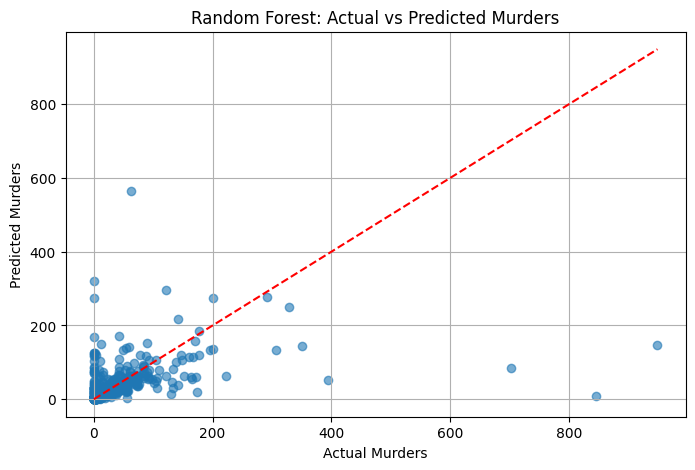

In [14]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_augmented, y, test_size=0.2, random_state=42
)

# Random Forest Regressor 

from sklearn.ensemble import RandomForestRegressor

# Initialize and train
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#Predictions & Evaluations
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = rf.predict(X_test)

# Evaluation metrics
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Visualize Predicted vs Actual

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y = x line
plt.xlabel("Actual Murders")
plt.ylabel("Predicted Murders")
plt.title("Random Forest: Actual vs Predicted Murders")
plt.grid(True)
plt.show()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19009 (74.25 KB)
Trainable params: 19009 (74.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100

71/71 [==============================] - 2s 6ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 2/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 3/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0016 - 

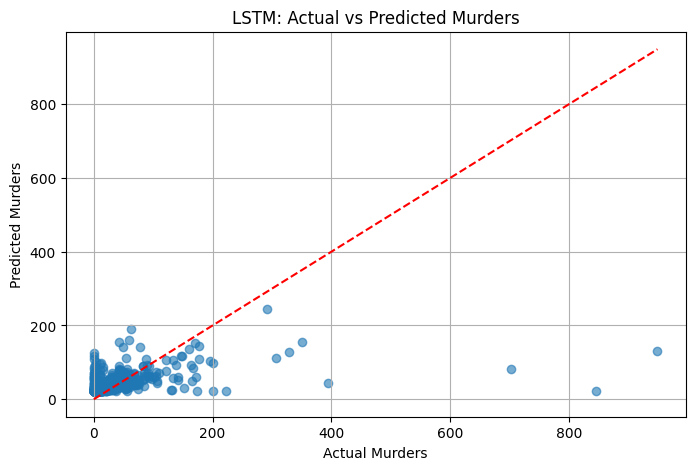

In [15]:
# LSTM Based Model 

from sklearn.preprocessing import MinMaxScaler

X_seq = X[:, :3]

# Normalize values to [0, 1]
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(X_seq)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Reshape for LSTM (samples, timesteps, features)
X_lstm = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Train-test split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y_scaled, test_size=0.2, random_state=42
)

#Training the LSTM Model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(3, 1)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

history = model.fit(X_train_lstm, y_train_lstm, epochs=100, validation_split=0.1, verbose=1)

# Predictions & Evaluations
y_pred_lstm = model.predict(X_test_lstm)

# Inverse transform to original scale
y_pred_orig = scaler_y.inverse_transform(y_pred_lstm)
y_test_orig = scaler_y.inverse_transform(y_test_lstm)

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE :", mean_absolute_error(y_test_orig, y_pred_orig))
print("RMSE:", np.sqrt(mean_squared_error(y_test_orig, y_pred_orig)))
print("R² Score:", r2_score(y_test_orig, y_pred_orig))

# Visualize Predicted vs Actual

plt.figure(figsize=(8,5))
plt.scatter(y_test_orig, y_pred_orig, alpha=0.6)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.xlabel("Actual Murders")
plt.ylabel("Predicted Murders")
plt.title("LSTM: Actual vs Predicted Murders")
plt.grid(True)
plt.show()




=== Modeling 'murder' using Random Forest ===
MAE : 11.727613524502713
RMSE: 22.03926488752239
R² Score: 0.48317935666597256


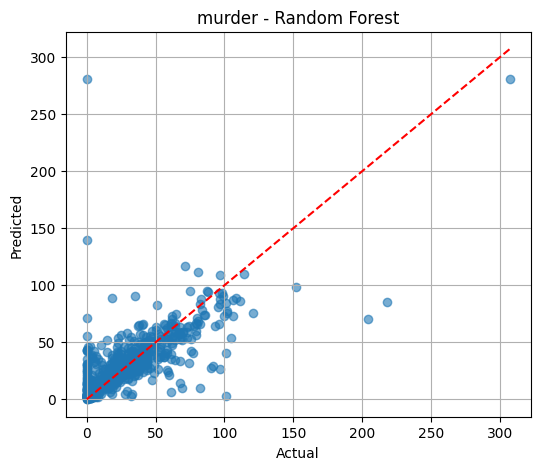


=== Modeling 'murder' using LSTM ===
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 crime_sequence (InputLayer  [(None, 3, 1)]               0         []                            
 )                                                                                                
                                                                                                  
 lstm_1 (LSTM)               (None, 64)                   16896     ['crime_sequence[0][0]']      
                                                                                                  
 dropout (Dropout)           (None, 64)                   0         ['lstm_1[0][0]']              
                                                                                                  
 district_code (InputLayer)  [(None, 1)]                

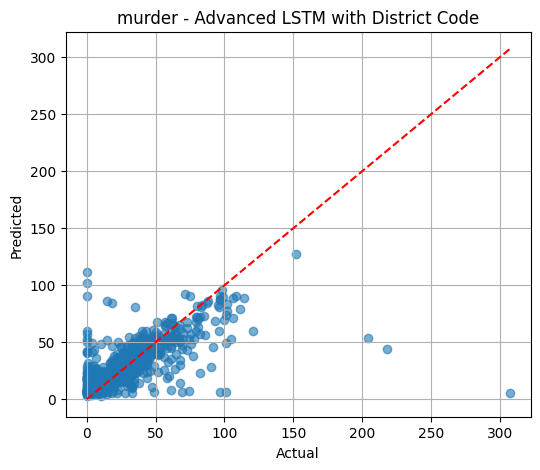

c:\Users\Keshav\.conda\envs\tf_env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
# Generalize for any crime type

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
import joblib

def run_model_for_crime(df, crime_col, window_rf=3, window_lstm = 3):

    # Generate time-series samples for random forest and LSTM
    X_rf, y_rf, district_ids_rf, target_year_rf = create_time_series_samples(df, crime_col=crime_col, window=window_rf)

    X_lstm, y_lstm, district_ids_lstm, target_year_lstm = create_time_series_samples(df, crime_col=crime_col, window=window_lstm)

    # Add district_code as feature
    X_augmented = np.hstack([X_rf, district_ids_rf.reshape(-1, 1)])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_augmented, y_rf, test_size=0.2, random_state=42
    )

    # === Random Forest ===
    print(f"\n=== Modeling '{crime_col}' using Random Forest ===")
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))

    # Plot
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{crime_col} - Random Forest")
    plt.grid(True)
    plt.show()

    # Save the model
    joblib.dump(model, f'{crime_col}_rf_model.pkl')

    # === LSTM ===
    print(f"\n=== Modeling '{crime_col}' using LSTM ===")
    
    X_crime = X_lstm  # shape: (samples, window)
    X_dist = district_ids_lstm.reshape(-1, 1)  # shape: (samples, 1)

    # Normalize
    scaler_crime = MinMaxScaler()
    scaler_y = MinMaxScaler()
    scaler_dist = MinMaxScaler()

    X_crime_scaled = scaler_crime.fit_transform(X_crime)
    X_dist_scaled = scaler_dist.fit_transform(X_dist)
    y_scaled = scaler_y.fit_transform(y_lstm.reshape(-1, 1))

    # Reshape for LSTM (samples, timesteps, features)
    X_crime_seq = X_crime_scaled.reshape((X_crime_scaled.shape[0], window_lstm, 1))
    Xc_train, Xc_test, Xd_train, Xd_test, y_train, y_test = train_test_split(
        X_crime_seq, X_dist_scaled, y_scaled, test_size=0.2, random_state=42
    )

    # Build advanced LSTM model

    input_seq = Input(shape=(window_lstm, 1), name='crime_sequence')
    x = LSTM(64, activation='relu', return_sequences=False)(input_seq)
    x = Dropout(0.3)(x)

    input_dist = Input(shape=(1,), name='district_code')
    merged = Concatenate()([x, input_dist])
    dense = Dense(64, activation='relu')(merged)
    dense = Dropout(0.2)(dense)
    dense = Dense(32, activation='relu')(dense)
    output = Dense(1)(dense)

    model = Model(inputs=[input_seq, input_dist], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    model.summary()

    # Train the model
    model.fit(
        [Xc_train, Xd_train], y_train,
        validation_split=0.1,
        epochs=100, batch_size=16,
        verbose=0
    )

    # Predict & inverse scale
    y_pred_scaled = model.predict([Xc_test, Xd_test])
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # Evaluation metrics
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))

    # Plot
    plt.figure(figsize=(6, 5))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{crime_col} - Advanced LSTM with District Code")
    plt.grid(True)
    plt.show()

    # Save the model
    model.save(f'{crime_col}_lstm_model.h5')

    # Save scalers
    joblib.dump(scaler_crime, f'{crime_col}_lstm_scaler_crime.pkl')
    joblib.dump(scaler_y, f'{crime_col}_lstm_scaler_target.pkl')
    joblib.dump(scaler_dist, f'{crime_col}_lstm_scaler_district.pkl')

# User input for crime type and model
crime_type = input("Enter crime type (e.g., murder, rape, robbery): ").strip().lower()

if crime_type not in df.columns:
    raise ValueError("Invalid crime type. Please enter a valid column name.")

# User input for lstm window size
window_size = int(input("Enter window size for LSTM: ").strip())

run_model_for_crime(df, crime_col=crime_type, window_lstm=window_size )


